# Assignment 14 : Decision Tree (Fraud_check.csv)

# -------------------------------------------------------------------------------------------------------------



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud_c = pd.read_csv('Fraud_check.csv')
fraud_c.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud_c.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#Label Encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# encode variables with ordinal encoding
fraud_c['Undergrad'] = label_encoder.fit_transform(fraud_c['Undergrad'])
fraud_c['Marital.Status'] = label_encoder.fit_transform(fraud_c['Marital.Status'])
fraud_c['Urban'] = label_encoder.fit_transform(fraud_c['Urban'])
fraud_c

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [7]:
# Converting the Target column i.e. Taxable Income into Categorical value
tax_val = []
for value in fraud_c["Taxable.Income"]:
 if value<=30000:
    tax_val.append("Risky")
 else:
    tax_val.append("Good")
fraud_c["tax_val"]= tax_val

In [8]:
fraud_c

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [11]:
#Label Encoding
#Risky=1 and Good=0

fraud_c['tax_val'] = label_encoder.fit_transform(fraud_c['tax_val'])
fraud_c

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


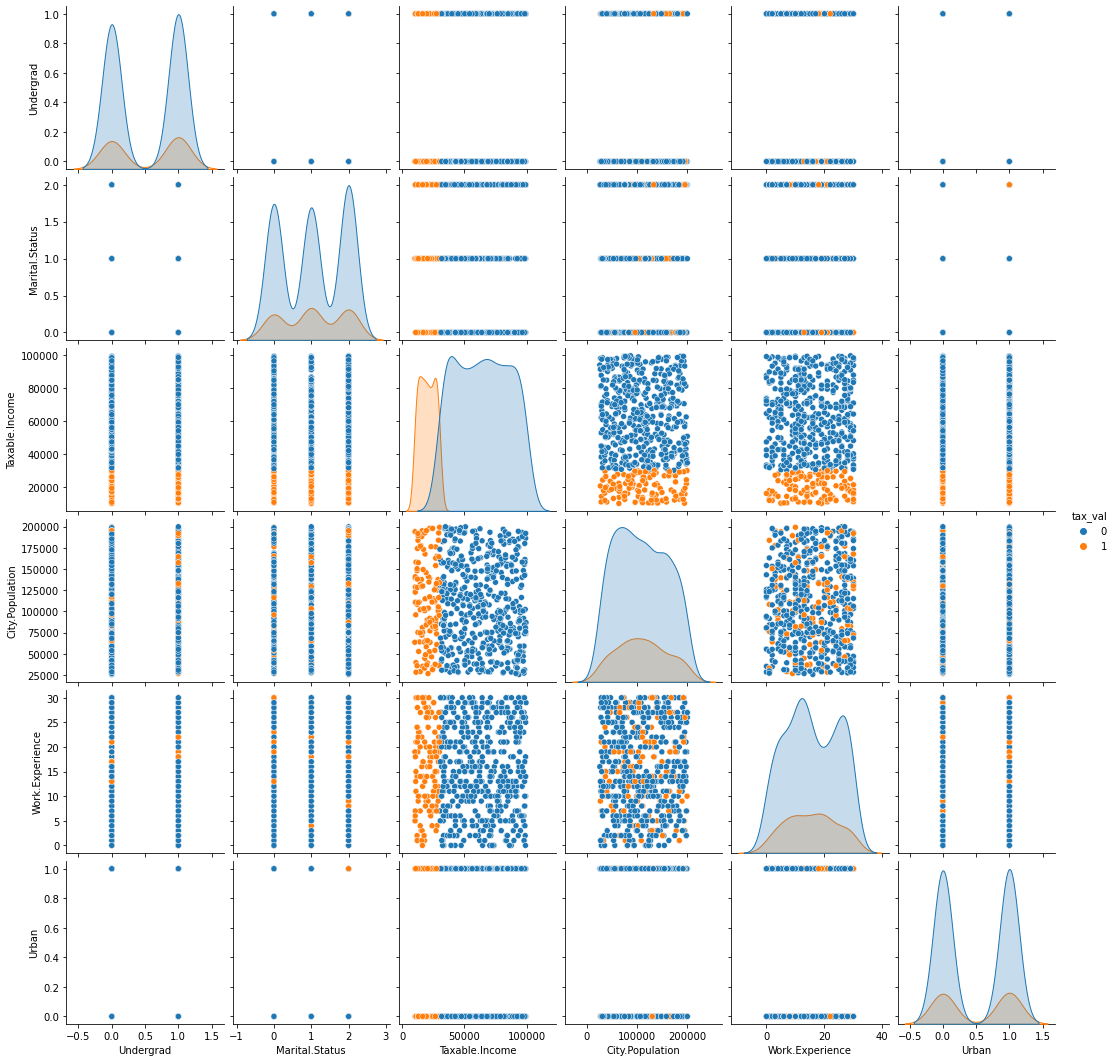

In [34]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud_c, hue = 'tax_val')


In [35]:
x = fraud_c.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud_c['tax_val']

In [36]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_val, Length: 600, dtype: int64

In [38]:
colnames = list(fraud_c.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'tax_val']

In [39]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [40]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [41]:
y_train

332    0
13     0
274    0
257    0
112    0
      ..
440    0
165    0
7      0
219    1
326    1
Name: tax_val, Length: 480, dtype: int64

In [42]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
102,1,0,91488,23,0
577,1,1,52940,5,1
18,1,0,59269,6,0
560,0,0,182562,24,0


In [43]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
102    0
577    0
18     0
560    0
62     0
Name: tax_val, Length: 120, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [44]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Text(0.5, 1.0, 'Decision tree using Entropy')

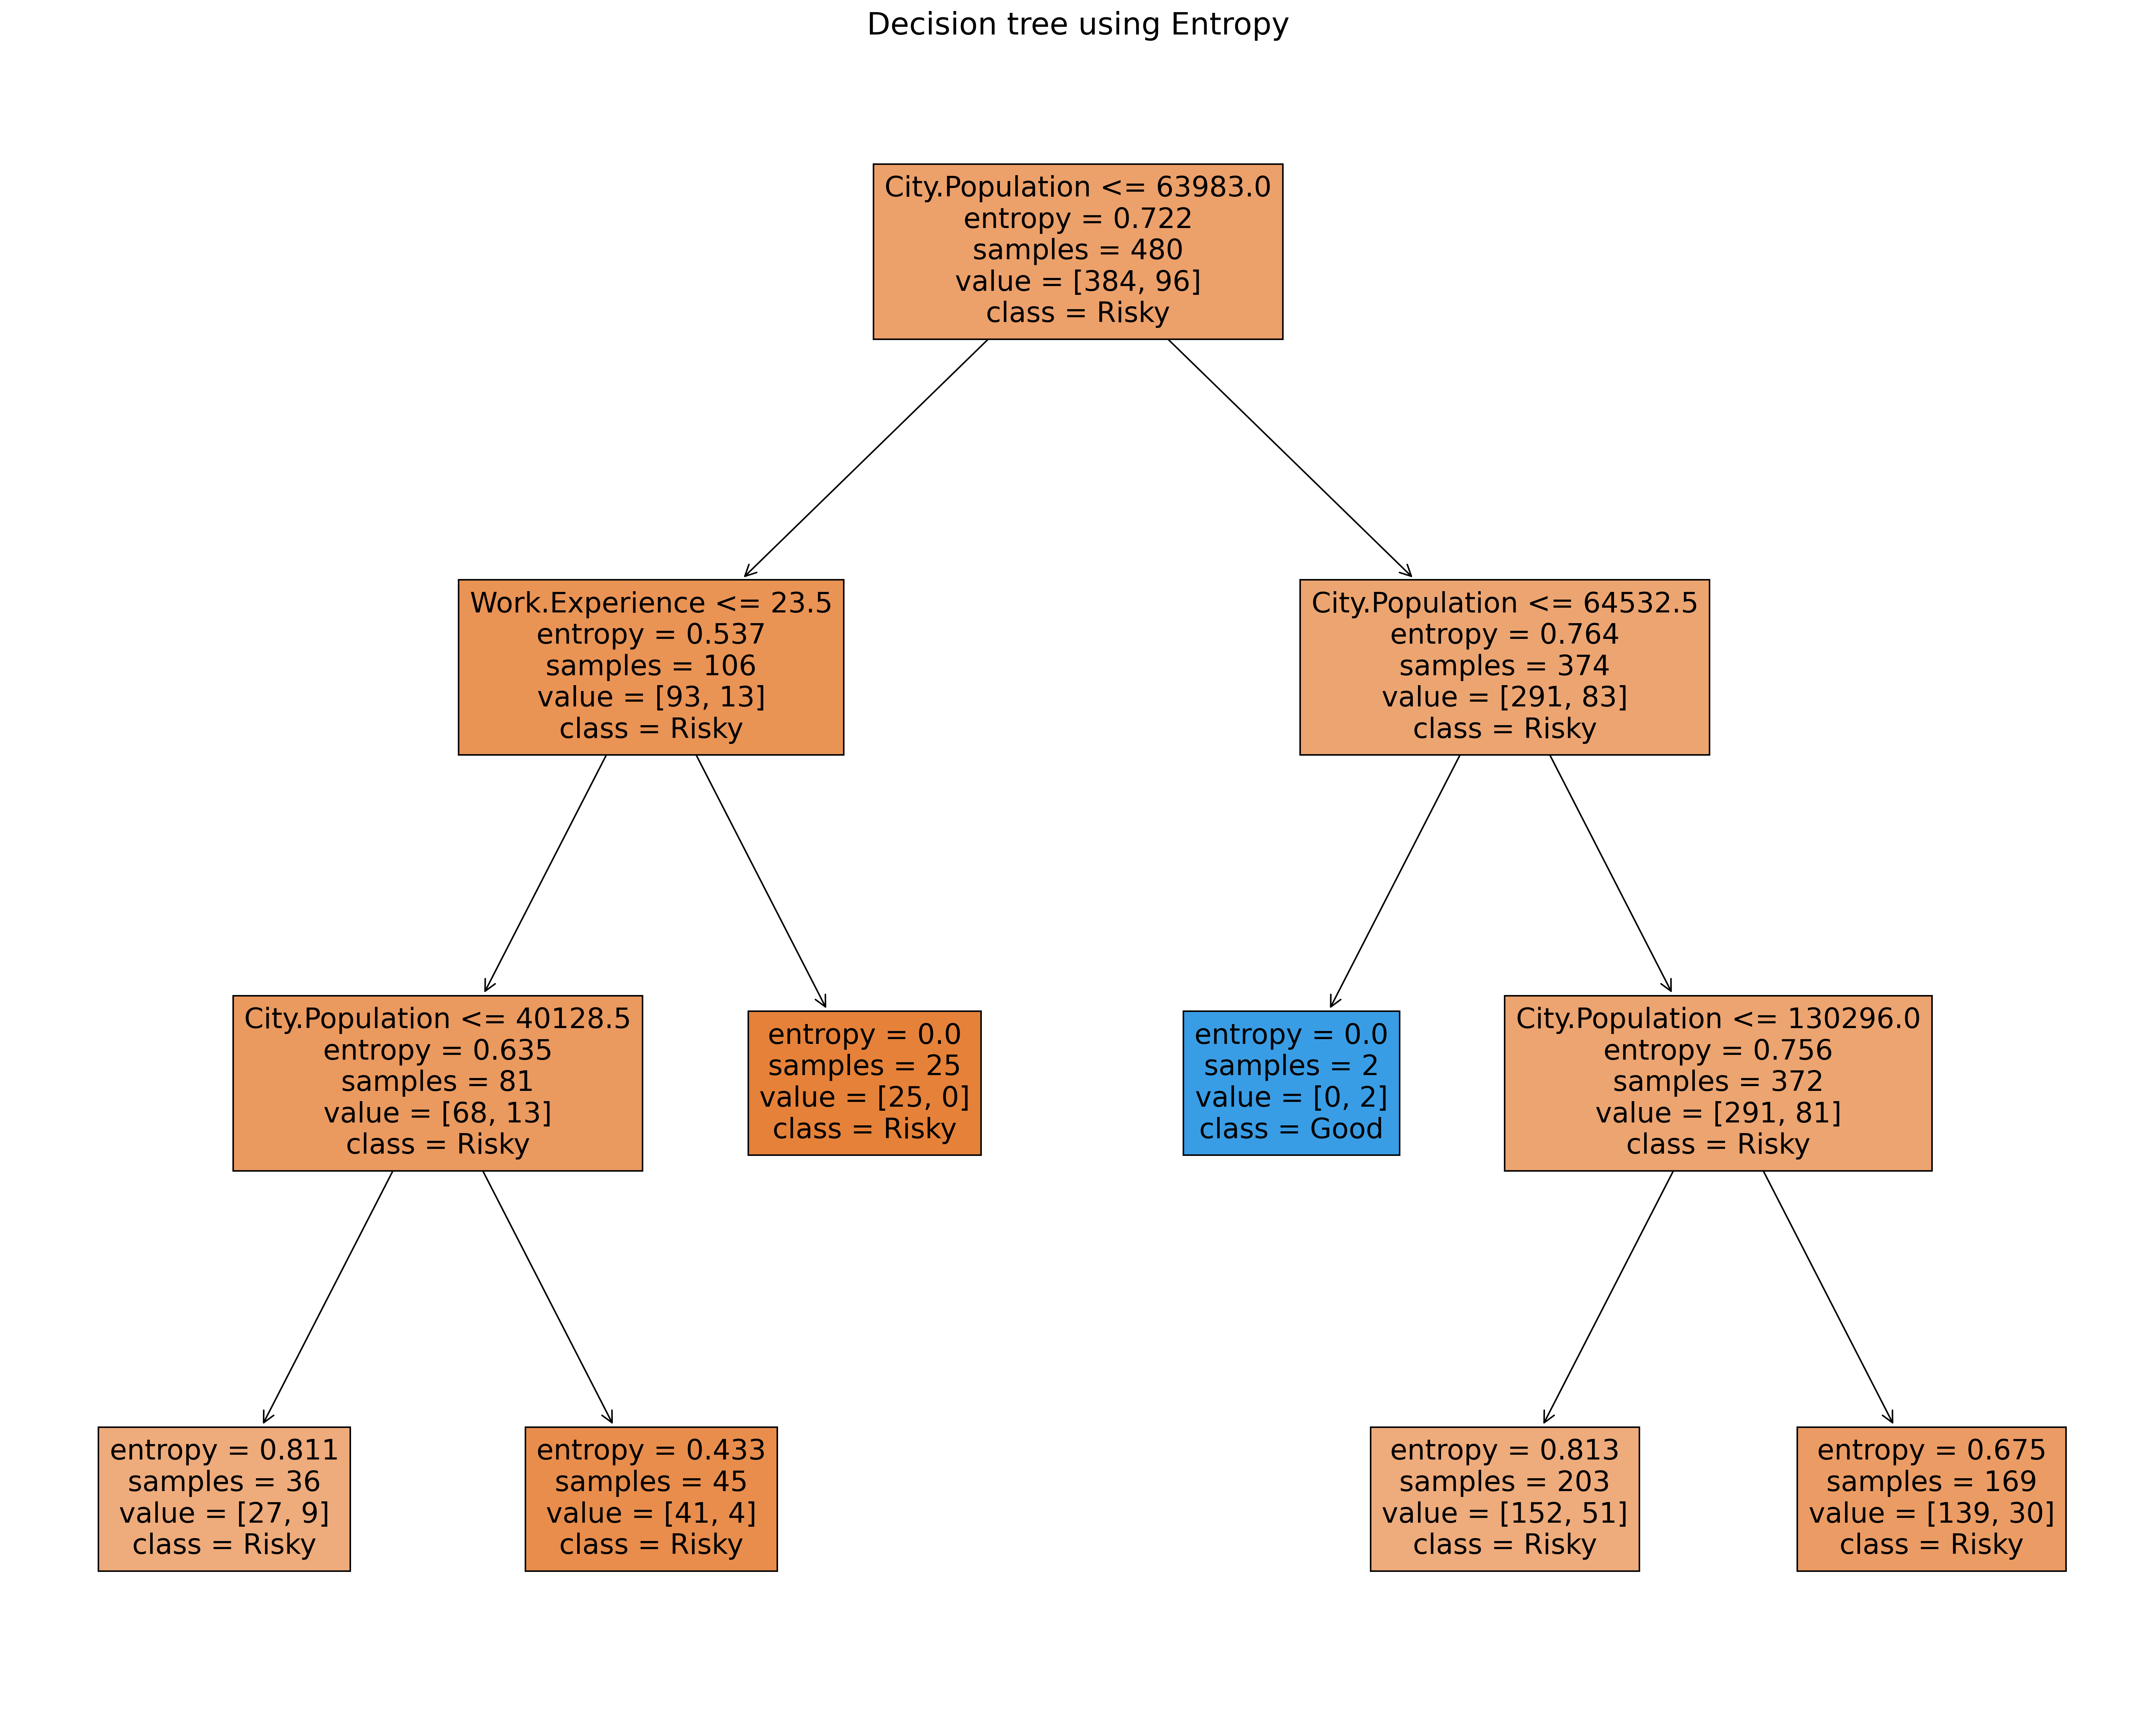

In [45]:

# plot the decision tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (25,20), dpi = 300)
tree.plot_tree(model,feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True);
plt.title('Decision tree using Entropy',fontsize=20)

In [46]:
# 0 label = No
# 1 label = Yes

# Predicting on test data
preds = model.predict(x_test) #predicting on test dataset
pd.Series(preds).value_counts() # getting the count of each category

0    120
dtype: int64

In [47]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
pd.crosstab(y_test, preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
tax_val,
0,92
1,28


In [49]:
# Accuracy
print('Accuracy is:',np.mean(preds == y_test))

Accuracy is: 0.7666666666666667


# Building Decision Tree Classifier (CART) using Gini Criteria

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [51]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [52]:
# Prediction and computing the accuracy
pred = model_gini.predict(x_test)
print('Accuracy is:',np.mean(preds == y_test))

Accuracy is: 0.7666666666666667


Text(0.5, 1.0, 'Decision tree using Gini Criteria')

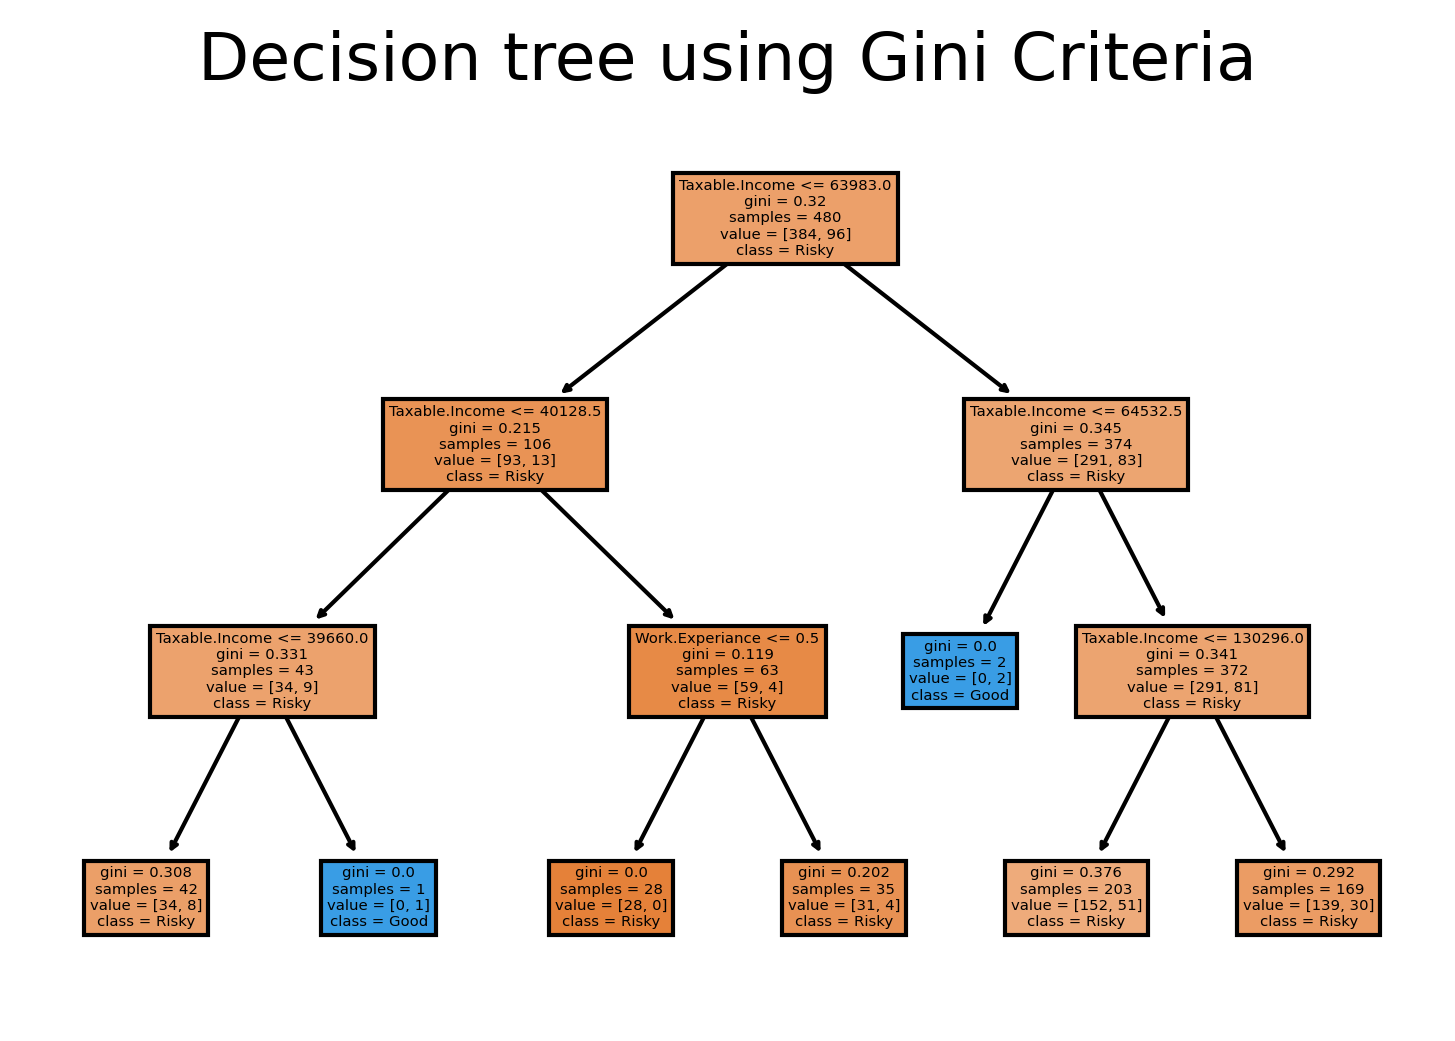

In [53]:

# let's plot the decision tree
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (6,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn,
               class_names = cn,
               filled = True);
plt.title('Decision tree using Gini Criteria',fontsize=16)

# Decision tree regression

In [54]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [55]:
array = fraud_c.values
X = array[:,0:4]
Y = array[:,4]

In [56]:
X

array([[     0,      2,  68833,  50047],
       [     1,      0,  33700, 134075],
       [     0,      1,  36925, 160205],
       ...,
       [     0,      0,  47334, 154058],
       [     1,      1,  98592, 180083],
       [     0,      0,  96519, 158137]], dtype=int64)

In [57]:
# Work.Experience column - Dependent Variable
Y

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0

In [58]:
# splitting data into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state= 1)

In [59]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [60]:

print('Train data Accuracy is:',model.score(X_train, Y_train))

Train data Accuracy is: 1.0


In [61]:
# Find the accuracy

print('Test data Accuracy is:',model.score(X_test, Y_test))

Test data Accuracy is: -1.1035119103403033
